In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.shape

(48842, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.replace( '?', np.nan, inplace=True)

In [7]:
df.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [8]:
cols = df.columns

In [9]:
def valuecount(cols):
    for col in cols:
        print(f'The value count of {col} is \n {df[col].value_counts()}')

In [10]:
valuecount(cols=cols)

The value count of age is 
 36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64
The value count of workclass is 
 Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
The value count of fnlwgt is 
 203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64
The value count of education is 
 HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th

<Axes: >

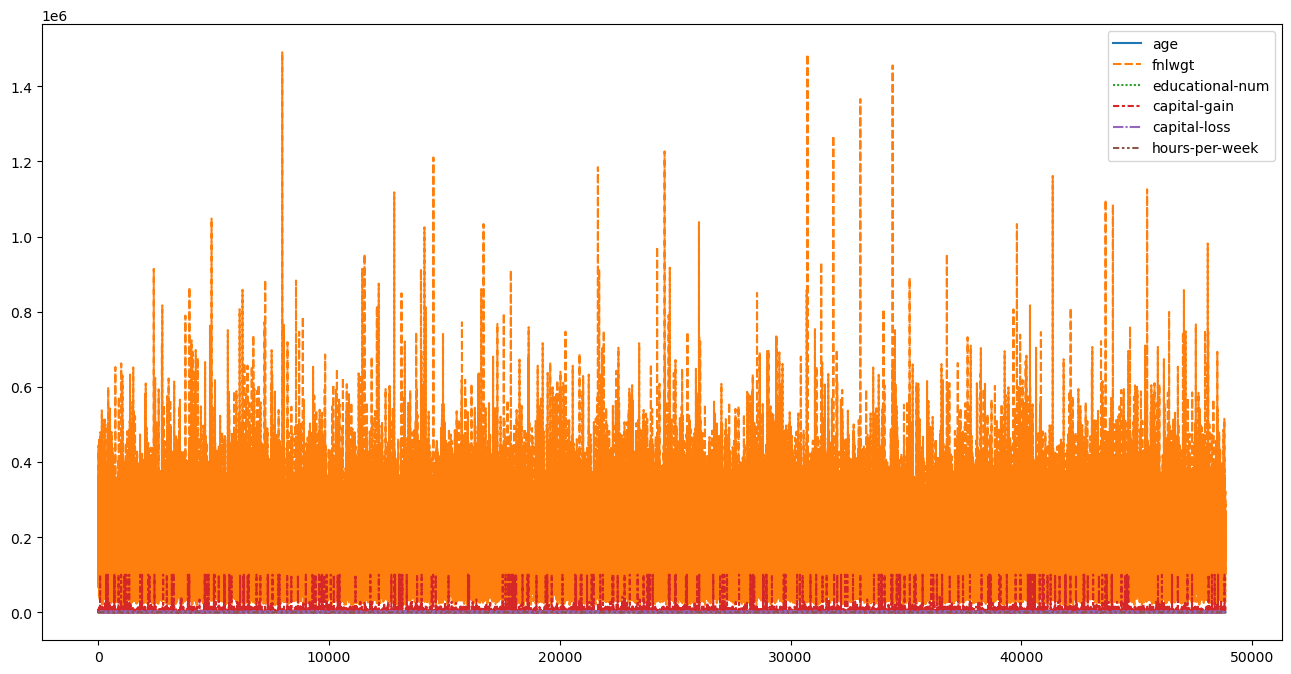

In [11]:
plt.figure(figsize=(16,8))
sns.lineplot(df)

In [12]:
# sns.pairplot(data=df, hue='income');

In [13]:
cols

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [14]:
df['educational-num'].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [15]:
df = df.drop(['education', 'native-country'], axis=1)

In [16]:
type(df['marital-status'].values)

numpy.ndarray

In [17]:
def encoding(*args, df):
    le = LabelEncoder()
    for col in args:
        df[col] = le.fit_transform(df[col])
    return df

In [18]:
df.head(1)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,<=50K


In [19]:
encoding('workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', df=df)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,<=50K
2,28,1,336951,12,2,10,0,4,1,0,0,40,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,>50K
4,18,8,103497,10,4,14,3,4,0,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,<=50K


In [20]:
def display_barplot(df, col, y='income'):
    sns.barplot(x=col, y=y, data=df)
    plt.title(f'barplot of {col} and income')
    plt.xlabel(col)
    plt.ylabel('Income')
    plt.show();

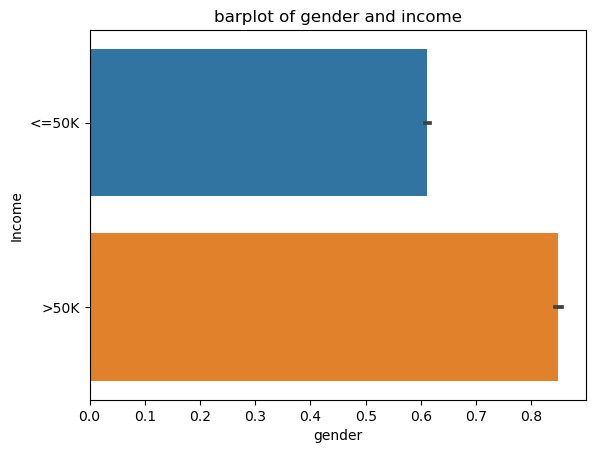

In [21]:
display_barplot(df=df, col='gender')

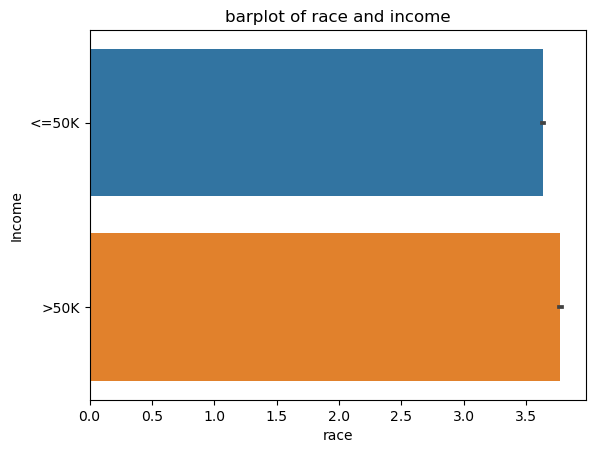

In [22]:
display_barplot(df=df, col='race')

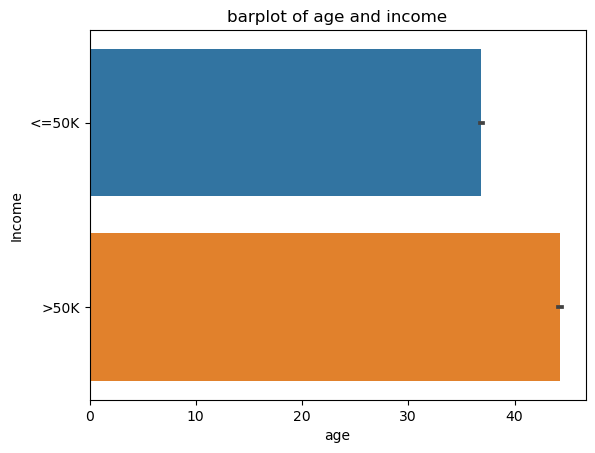

In [23]:
display_barplot(col='age', df=df)

In [24]:
encoding('income', df=df)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,0
1,38,3,89814,9,2,4,0,4,1,0,0,50,0
2,28,1,336951,12,2,10,0,4,1,0,0,40,1
3,44,3,160323,10,2,6,0,2,1,7688,0,40,1
4,18,8,103497,10,4,14,3,4,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,12,5,4,0,0,0,38,0
48838,40,3,154374,9,2,6,0,4,1,0,0,40,1
48839,58,3,151910,9,6,0,4,4,0,0,0,40,0
48840,22,3,201490,9,4,0,3,4,1,0,0,20,0


In [34]:
X = df.drop('income', axis=1).values

In [35]:
y = df['income'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=0)

In [37]:
y_test

array([0, 1, 1, ..., 0, 0, 0])

In [38]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred_naive = naive.predict(X_test)
y_pred_naive = y_pred_naive.reshape(len(y_pred_naive), 1)
y_test = y_test.reshape(len(y_test), 1)

In [45]:
np.set_printoptions(precision=2)
np.concatenate((y_test, y_pred_naive), 1)

array([[0, 0],
       [1, 0],
       [1, 1],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [49]:
print(confusion_matrix(y_test, y_pred_naive))
print(accuracy_score(y_test, y_pred_naive) * 100)

[[7026  394]
 [1610  739]]
79.48612959361245


In [57]:
forest = RandomForestClassifier(criterion='gini')
forest.fit(X_train, y_train);

In [58]:
forest_pred = forest.predict(X_test)
forest_pred = forest_pred.reshape(len(forest_pred), 1)

In [59]:
np.concatenate((y_test, forest_pred), 1)

array([[0, 0],
       [1, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 0],
       [0, 0]])

In [60]:
print(confusion_matrix(y_test, forest_pred))
print(accuracy_score(y_test, forest_pred) * 100)

[[6903  517]
 [ 855 1494]]
85.95557375371071


### The random forest estimator gives the accuracy score of 85.95 which is greater than that of the Naive Bayess estimator.